### Clustering

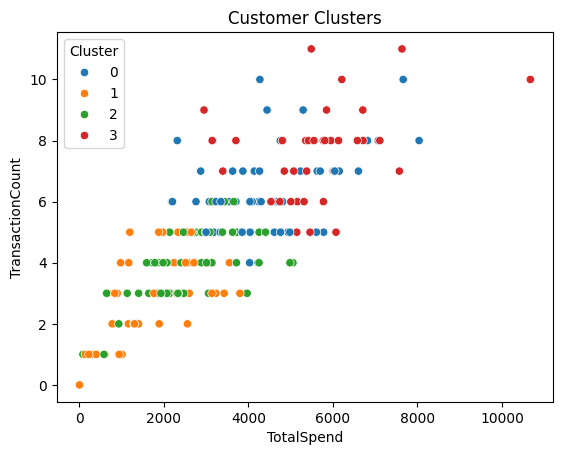

Davies-Bouldin Index: 0.9615679027684785
Clustering results saved to Rishita_Gagrani_ClusteringResults.csv


In [ ]:
# Feature engineering for clustering
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['DaysSinceSignup'] = (pd.Timestamp.now() - customers['SignupDate']).dt.days

# Aggregating transaction data
agg_transactions = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'TransactionID': 'count'})
agg_transactions.rename(columns={'TotalValue': 'TotalSpend', 'TransactionID': 'TransactionCount'}, inplace=True)

# Merging with customer data
segmentation_data = pd.merge(customers, agg_transactions, on='CustomerID', how='left')
segmentation_data.fillna(0, inplace=True)

# Normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data[['TotalSpend', 'TransactionCount', 'DaysSinceSignup']])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
segmentation_data['Cluster'] = kmeans.labels_

# Visualizing clusters
sns.scatterplot(data=segmentation_data, x='TotalSpend', y='TransactionCount', hue='Cluster', palette='tab10')
plt.title('Customer Clusters')
plt.show()

# Davies-Bouldin Index for evaluation
db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

# Save clustering results
output_clustering_csv = 'Rishita_Gagrani_ClusteringResults.csv'
segmentation_data.to_csv(output_clustering_csv, index=False)
print(f"Clustering results saved to {output_clustering_csv}")